# Dane i ich obróbka na potrzeby raportu "Analiza rynku ropy nafotwej w XXI wieku"

## Zaimportowanie potrzebnych bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num,MinuteLocator
from scipy.stats import pearsonr
import seaborn as sns

## Przerzucenie danych do data frame

In [3]:
df = pd.read_csv(r'C:\Users\Maciej\Desktop\Projekt\Projekt Big Data\BRENTEU.csv')
df2 = pd.read_csv(r'C:\Users\Maciej\Desktop\Projekt\Projekt Big Data\WTI.csv')

In [4]:
df2['DCOILBRENTEU'] = df['DCOILBRENTEU']

In [5]:
df2['DCOILBRENTEU'] = df2['DCOILBRENTEU'].map(lambda x: float(x))

df2['DCOILWTICO'] = df2['DCOILWTICO'].map(lambda x: float(x))

df2['DATE'] = pd.to_datetime(df2['DATE'])

In [6]:
df2['month'] = df2['DATE'].dt.month
pd.set_option('display.max_rows', 300)

## Dane sumaryczne WTI i BRENT

In [59]:
dane_sumaryczne = pd.DataFrame(df2['DCOILWTICO'].describe()[['mean','std','min','max','25%','50%','75%']])

In [60]:
dane_sumaryczne['DCOILBRENTEU'] = pd.DataFrame(df2['DCOILBRENTEU'].describe()[['std','mean','min','max','25%','50%','75%']])

In [61]:
dane_sumaryczne

,DCOILWTICO,DCOILBRENTEU
mean,64.834086,68.123695
std,25.062569,28.706811
min,16.547619,18.378500
max,133.880000,132.718182
25%,46.712381,46.567727
50%,60.441818,63.919130
75%,85.798696,91.446818


## Wykres przedstawiający sytuację ropy w XXI wieku

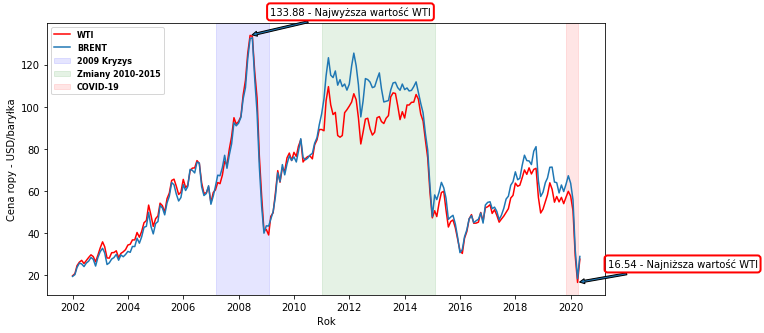

In [106]:
bbox_props = dict(boxstyle="round", fc='none',ec='r', lw=2)

plt.figure(figsize=(10,5))
plt.plot(df2['DATE'],df2['DCOILWTICO'],'r', label = 'WTI')
plt.plot(df2['DATE'],df2['DCOILBRENTEU'], label = 'BRENT')

plt.axvspan(date2num(datetime(2007,3,10)), date2num(datetime(2009,2,10)), 
           label="2009 Kryzys",color="blue", alpha=0.1)

plt.axvspan(date2num(datetime(2011,1,10)), date2num(datetime(2015,2,10)),
           label = 'Zmiany 2010-2015', color = "green", alpha = 0.1)


plt.axvspan(date2num(datetime(2019,11,1)), date2num(datetime(2020,4,10)),
           label = 'COVID-19', color = "red", alpha = 0.1)

plt.annotate('133.88 - Najwyższa wartość WTI', (date2num(df2['DATE'][77]), df2['DCOILWTICO'][77]), xytext=(20, 20), 
            textcoords='offset points', arrowprops={'arrowstyle':'simple'},bbox=bbox_props)

plt.annotate('16.54 - Najniższa wartość WTI', (date2num(df2['DATE'][219]), df2['DCOILWTICO'][219]), xytext=(30, 15), 
            textcoords='offset points', arrowprops={'arrowstyle':'simple'},bbox=bbox_props)

plt.xlabel('Rok')
plt.ylabel('Cena ropy - USD/baryłka')

plt.legend(loc=2, prop={'size': 8,'weight':'bold'})
plt.savefig('Wykres_wartości_ropy.png', bbox_inches = 'tight')
plt.show()

### Wyszukuję daty skrajnych wartości cenowych WTI

In [123]:
df2[df2['DCOILWTICO'] == df2['DCOILWTICO'].max()]

,DATE,DCOILWTICO,DCOILBRENTEU,month
77,2008-06-01,133.88,132.322381,6


In [142]:
df2[df2['DCOILWTICO'] == df2['DCOILWTICO'].min()]

,DATE,DCOILWTICO,DCOILBRENTEU,month
219,2020-04-01,16.547619,18.3785,4


### Przygotowuję dane odnośnie cen ropy w czasie globalnego kryzysu 2007-2009

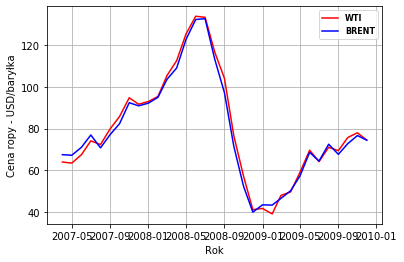

<Figure size 7200x7200 with 0 Axes>

In [118]:
plt.plot(kryzys['DATE'],kryzys['DCOILWTICO'],'r', label = 'WTI')
plt.plot(kryzys['DATE'],kryzys['DCOILBRENTEU'],'b', label = 'BRENT')
plt.grid()
plt.xlabel('Rok')
plt.ylabel('Cena ropy - USD/baryłka')
plt.legend(loc=1, prop={'size': 8,'weight':'bold'})
plt.figure(figsize = (100,100))
plt.savefig('Ropa - kryzys globalny.png', bbox_inches = 'tight')
plt.show()

### Przygotowuję dane odnośnie zmian wartości ropy w latach 2010-2015

In [30]:
Zmiany = df2[(df2['DATE'] > '2010-11-10') & (df['DATE'] < '2015-2-10')]

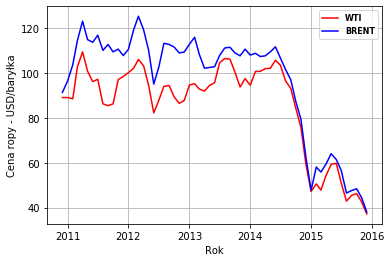

In [107]:
plt.plot(Zmiany['DATE'],Zmiany['DCOILWTICO'],'r', label = 'WTI')
plt.plot(Zmiany['DATE'],Zmiany['DCOILBRENTEU'],'b', label = 'BRENT')
plt.grid()
plt.xlabel('Rok')
plt.ylabel('Cena ropy - USD/baryłka')
plt.legend(loc=1, prop={'size': 8,'weight':'bold'})
plt.savefig('Ropa - spadek i łupki.png', bbox_inches = 'tight')
plt.show()

### Aby skorzystać z danych odnośnie covid i ropy, musiałem utworzyć kopię tabeli

In [44]:
COVID =df2[(df2['DATE'].dt.year == 2020)]
COVID19 = COVID.copy()
COVID19['COVID_cases'] = list(cov19['total_cases'])

In [34]:
cov19 = pd.read_csv(r'C:\Users\macie\Downloads\owid-covid-data.csv')
cov19['total_cases'] = cov19['total_cases'].map(lambda x: int(x))

cov19['date'] = pd.to_datetime(cov19['date'])

In [36]:
cov19 = cov19[(cov19['location'] == 'World') & (cov19['date'].dt.day == 1) & (cov19['date'].dt.year == 2020)]

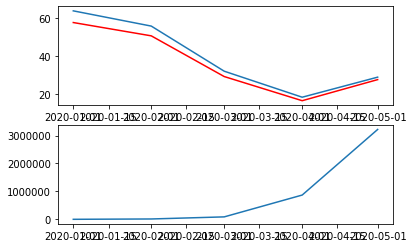

In [45]:
plt.subplot(2,1,1)
plt.plot(COVID['DATE'],COVID['DCOILWTICO'],'r')
plt.plot(COVID['DATE'],COVID['DCOILBRENTEU'])

plt.subplot(2,1,2)
plt.plot(COVID['DATE'],cov19['total_cases'])

## Sprawdzam korelację zarażeń koronawirusem z ceną ropy w początkowym okresie epidemii

In [48]:
COVID19.corr()

,DCOILWTICO,DCOILBRENTEU,COVID_cases
DCOILWTICO,1.000000,0.999365,-0.482611
DCOILBRENTEU,0.999365,1.000000,-0.511080
COVID_cases,-0.482611,-0.511080,1.000000


## Przygotowuję dane odnośnie siły dolara i sprawdzam korelację z cenami ropy

In [87]:
dolar = pd.read_csv(r'C:\Users\Maciej\Desktop\Projekt\Projekt Big Data\US Dollar Index Futures Historical Data.csv')

In [98]:
df2['Sila_dolara'] = dolar['Price']

In [100]:
df2.corr()

,DCOILWTICO,DCOILBRENTEU,Sila_dolara
DCOILWTICO,1.000000,0.978907,-0.629201
DCOILBRENTEU,0.978907,1.000000,-0.627119
Sila_dolara,-0.629201,-0.627119,1.000000
